In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def gerar_grafico_precos(local: str):
    if local.find("_") != -1:
        estado = local.split("_")[0]
        cidade = local.split("_")[1]
        
    # Ler os dados do CSV correspondente
    caminho_csv = f"media_{local}_mes_a_mes.csv"
    df = pd.read_csv(caminho_csv, sep=';')

    # Configurar o estilo do gráfico com seaborn (opcional)
    sns.set_theme(style="whitegrid")

    # Criar uma coluna 'Tempo' para facilitar o plot
    df["Tempo"] = df["Ano"].astype(str) + "-" + df["Mes"].astype(str).str.zfill(2)

    # Ordenar os dados por 'Tempo'
    df = df.sort_values(by="Tempo")

    # Criar o gráfico
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df, x="Tempo", y="Valor de Venda", hue="Produto")

    # Melhorar as labels e o título
    plt.xlabel("Tempo")
    plt.ylabel("Média do Valor de Venda (R$)")
    if local.find("_") != -1:
        plt.title(f"Média Mensal dos Preços dos Combustíveis em {cidade}-{estado} (2013-2024)")
    else:
        plt.title(f"Média Mensal dos Preços dos Combustíveis no {local.capitalize()} (2013-2024)")
    anos_unicos = df["Ano"].drop_duplicates().astype(str)
    plt.xticks(
    ticks=[df[df["Ano"] == int(ano)]["Tempo"].iloc[0] for ano in anos_unicos],
    labels=anos_unicos,
    )
    plt.tight_layout()
    plt.show()



In [12]:
def retorna_min_max_por_produto(local: str):
    # Ler os dados do CSV correspondente
    caminho_csv = f"media_{local}_mes_a_mes.csv"
    df = pd.read_csv(caminho_csv, sep=';')

    produtos = ["GASOLINA", "ETANOL", "DIESEL", "DIESEL S10"]

    for produto in produtos:
        df_produto = df[df["Produto"] == produto]
        maior = df_produto["Valor de Venda"].max()
        menor = df_produto["Valor de Venda"].min()
        print(f"Em {local}, o maior preço de venda do {produto} foi: {round(maior, 2)} e o menor foi: {round(menor, 2)}")

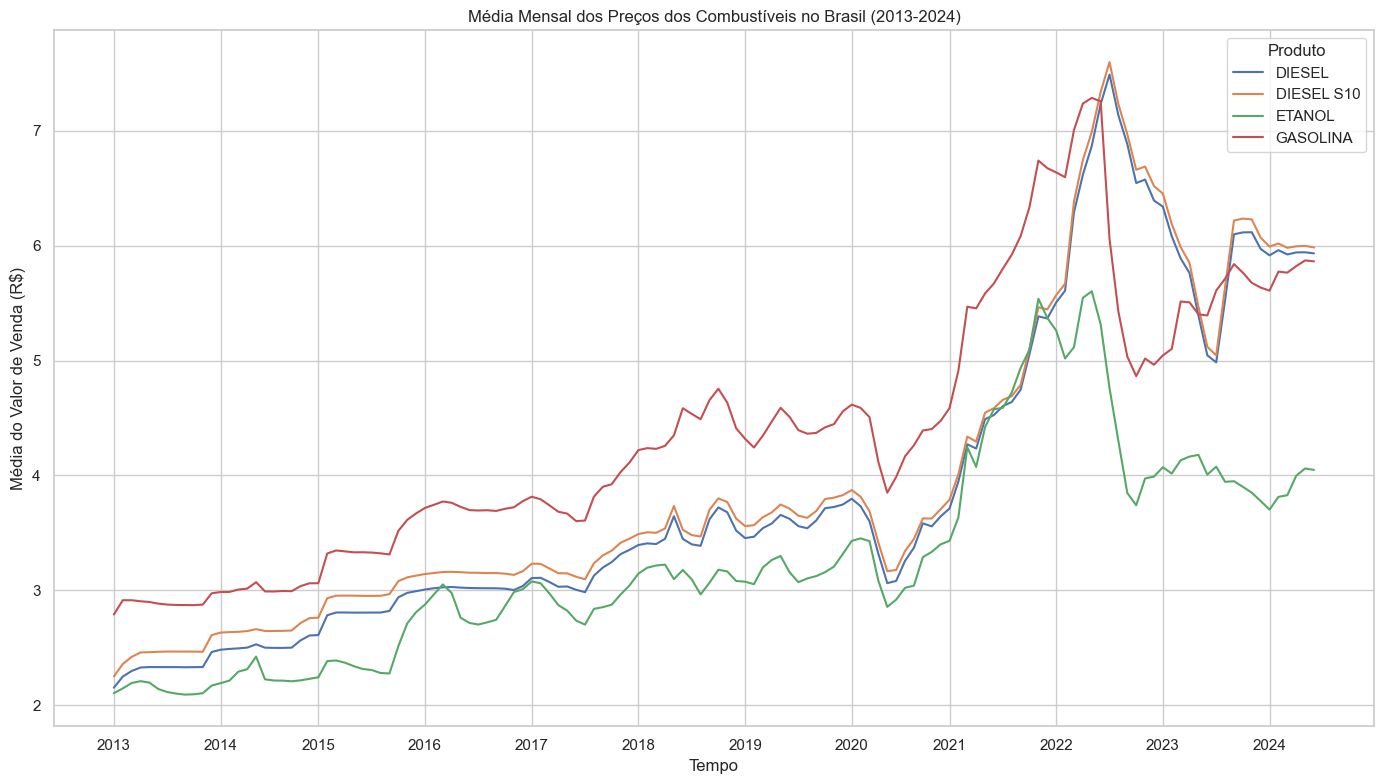

Em brasil, o maior preço de venda do GASOLINA foi: 7.29 e o menor foi: 2.79
Em brasil, o maior preço de venda do ETANOL foi: 5.6 e o menor foi: 2.09
Em brasil, o maior preço de venda do DIESEL foi: 7.49 e o menor foi: 2.15
Em brasil, o maior preço de venda do DIESEL S10 foi: 7.6 e o menor foi: 2.25


In [15]:
local = "brasil"
gerar_grafico_precos(local)
retorna_min_max_por_produto(local)

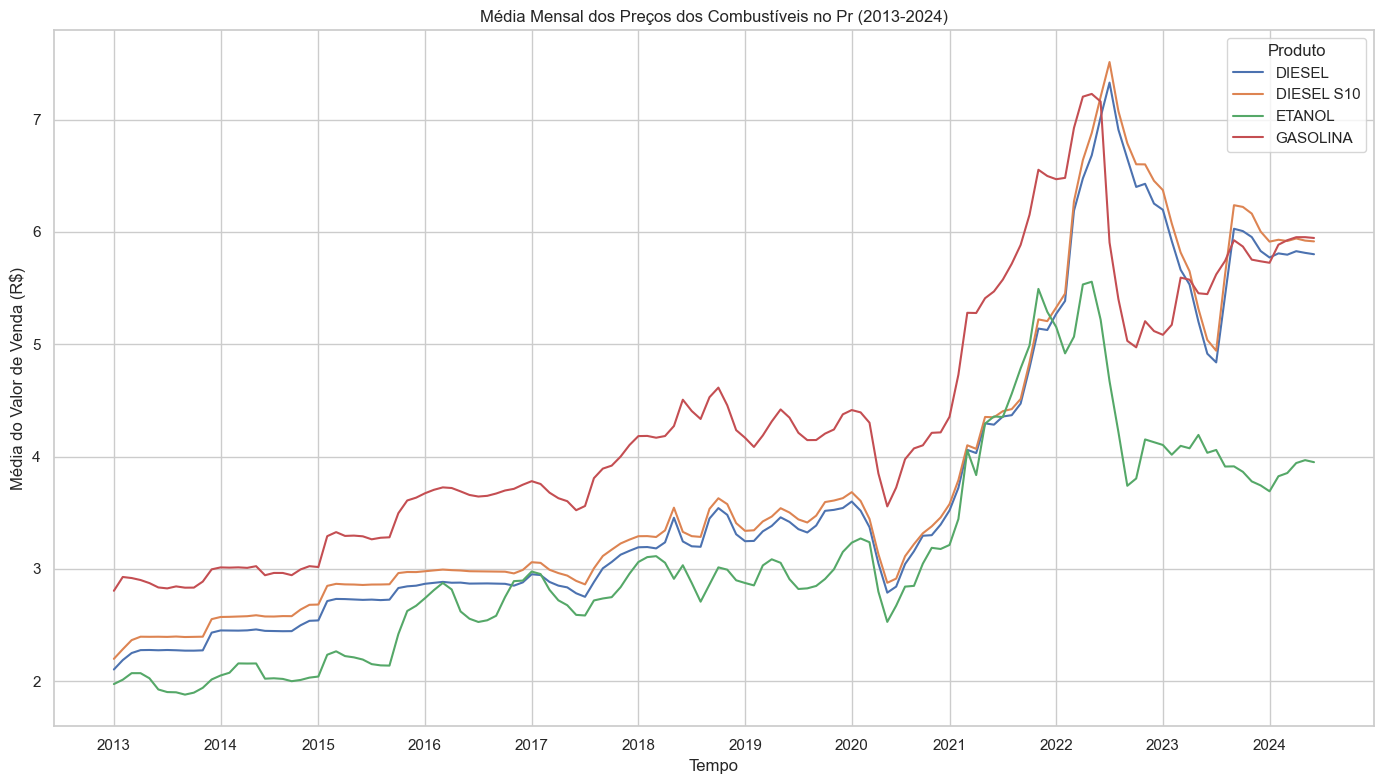

Em PR, o maior preço de venda do GASOLINA foi: 7.23 e o menor foi: 2.8
Em PR, o maior preço de venda do ETANOL foi: 5.56 e o menor foi: 1.88
Em PR, o maior preço de venda do DIESEL foi: 7.33 e o menor foi: 2.1
Em PR, o maior preço de venda do DIESEL S10 foi: 7.51 e o menor foi: 2.2


In [16]:
local = "PR"
gerar_grafico_precos(local)
retorna_min_max_por_produto(local)

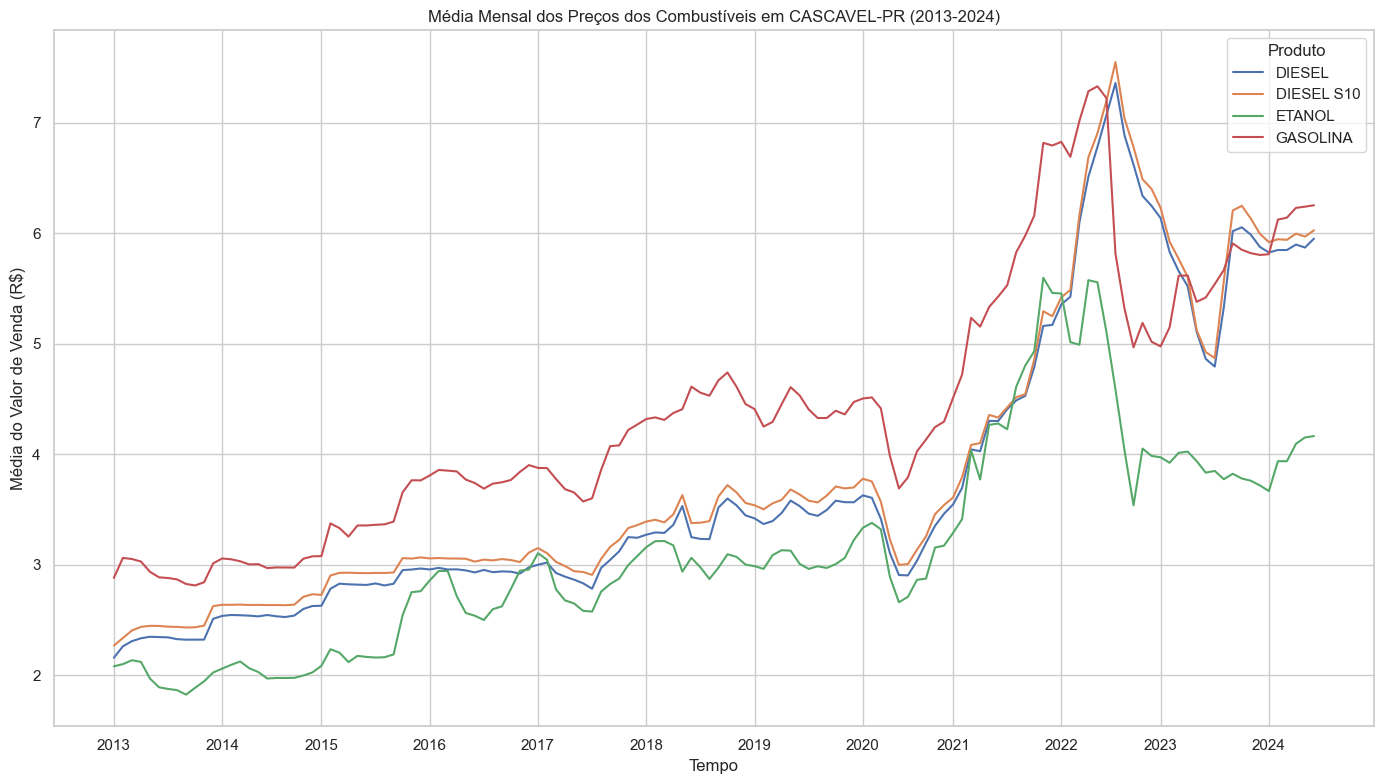

Em PR_CASCAVEL, o maior preço de venda do GASOLINA foi: 7.33 e o menor foi: 2.81
Em PR_CASCAVEL, o maior preço de venda do ETANOL foi: 5.6 e o menor foi: 1.83
Em PR_CASCAVEL, o maior preço de venda do DIESEL foi: 7.36 e o menor foi: 2.16
Em PR_CASCAVEL, o maior preço de venda do DIESEL S10 foi: 7.55 e o menor foi: 2.27


In [17]:
local = "PR_CASCAVEL"
gerar_grafico_precos(local)
retorna_min_max_por_produto(local)

In [19]:
def gerar_grafico_comparacao_precos_brasil_estado_por_produto(base, estado, produto):

    df_base = pd.read_csv(f"media_{base}_mes_a_mes.csv", sep=";")
    df_comparacao = pd.read_csv(f"media_{estado}_mes_a_mes.csv", sep=";")

    df_base_produto = df_base[df_base["Produto"] == produto]
    df_estado_produto = df_comparacao[df_comparacao["Produto"] == produto]

    # Criar uma coluna 'Tempo' para facilitar o plot
    df_base_produto["Tempo"] = (
        df_base_produto["Ano"].astype(str)
        + "-"
        + df_base_produto["Mes"].astype(str).str.zfill(2)
    )
    df_estado_produto["Tempo"] = (
        df_estado_produto["Ano"].astype(str)
        + "-"
        + df_estado_produto["Mes"].astype(str).str.zfill(2)
    )

    # Ordenar os dados por 'Tempo'
    df_base_produto = df_base_produto.sort_values(by="Tempo")
    df_estado_produto = df_estado_produto.sort_values(by="Tempo")

    # Criar o gráfico
    plt.figure(figsize=(14, 8))

    # Plotar os dados do Brasil
    sns.lineplot(
        data=df_base_produto,
        x="Tempo",
        y="Valor de Venda",
        label="Brasil",
    )

    # Plotar os dados do Estado
    sns.lineplot(
        data=df_estado_produto,
        x="Tempo",
        y="Valor de Venda",
        label=estado,
    )

    # Melhorar as labels e o título
    plt.xlabel("Tempo")
    plt.ylabel("Média do Valor de Venda (R$)")
    plt.title(f'Comparação dos Preços do Produto "{produto}" no Brasil e em {estado}')

    # Ajustar a visualização do eixo X para mostrar apenas os anos
    anos_unicos = df_base_produto["Ano"].drop_duplicates().astype(str)
    plt.xticks(
        ticks=[
            df_base_produto[df_base_produto["Ano"] == int(ano)]["Tempo"].iloc[0]
            for ano in anos_unicos
        ],
        labels=anos_unicos,
    )

    # Mostrar o gráfico
    plt.tight_layout()
    plt.legend()
    plt.show()

In [40]:
def gerar_grafico_comparacao_precos_locais_por_produto(local1, local2, local3, produto):
    # Ler os dados dos três locais
    df_local1 = pd.read_csv(f"media_{local1}_mes_a_mes.csv", sep=";")
    df_local2 = pd.read_csv(f"media_{local2}_mes_a_mes.csv", sep=";")
    df_local3 = pd.read_csv(f"media_{local3}_mes_a_mes.csv", sep=";")

    # Filtrar os dados para o produto específico
    df_local1_produto = df_local1[df_local1["Produto"] == produto]
    df_local2_produto = df_local2[df_local2["Produto"] == produto]
    df_local3_produto = df_local3[df_local3["Produto"] == produto]

    # Criar uma coluna 'Tempo' para facilitar o plot
    df_local1_produto["Tempo"] = (
        df_local1_produto["Ano"].astype(str)
        + "-"
        + df_local1_produto["Mes"].astype(str).str.zfill(2)
    )
    df_local2_produto["Tempo"] = (
        df_local2_produto["Ano"].astype(str)
        + "-"
        + df_local2_produto["Mes"].astype(str).str.zfill(2)
    )
    df_local3_produto["Tempo"] = (
        df_local3_produto["Ano"].astype(str)
        + "-"
        + df_local3_produto["Mes"].astype(str).str.zfill(2)
    )

    # Ordenar os dados por 'Tempo'
    df_local1_produto = df_local1_produto.sort_values(by="Tempo")
    df_local2_produto = df_local2_produto.sort_values(by="Tempo")
    df_local3_produto = df_local3_produto.sort_values(by="Tempo")

    # Criar o gráfico
    plt.figure(figsize=(14, 8))

    # Plotar os dados do Local 1
    sns.lineplot(
        data=df_local1_produto,
        x="Tempo",
        y="Valor de Venda",
        label=local1.upper(),
    )

    # Plotar os dados do Local 2
    sns.lineplot(
        data=df_local2_produto,
        x="Tempo",
        y="Valor de Venda",
        label=local2.upper(),
    )

    # Plotar os dados do Local 3
    sns.lineplot(
        data=df_local3_produto,
        x="Tempo",
        y="Valor de Venda",
        label=local3.split("_")[1].upper(),
    )

    # Melhorar as labels e o título
    plt.xlabel("Tempo")
    plt.ylabel("Média do Valor de Venda (R$)")

    # Ajustar a visualização do eixo X para mostrar apenas os anos
    anos_unicos = df_local1_produto["Ano"].drop_duplicates().astype(str)
    plt.xticks(
        ticks=[
            df_local1_produto[df_local1_produto["Ano"] == int(ano)]["Tempo"].iloc[0]
            for ano in anos_unicos
        ],
        labels=anos_unicos,
    )

    # Mostrar o gráfico
    plt.tight_layout()
    plt.legend()
    plt.show()


C:\Users\Pedro\AppData\Local\Temp\ipykernel_21952\2839018951.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_local1_produto["Tempo"] = (
C:\Users\Pedro\AppData\Local\Temp\ipykernel_21952\2839018951.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_local2_produto["Tempo"] = (
C:\Users\Pedro\AppData\Local\Temp\ipykernel_21952\2839018951.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

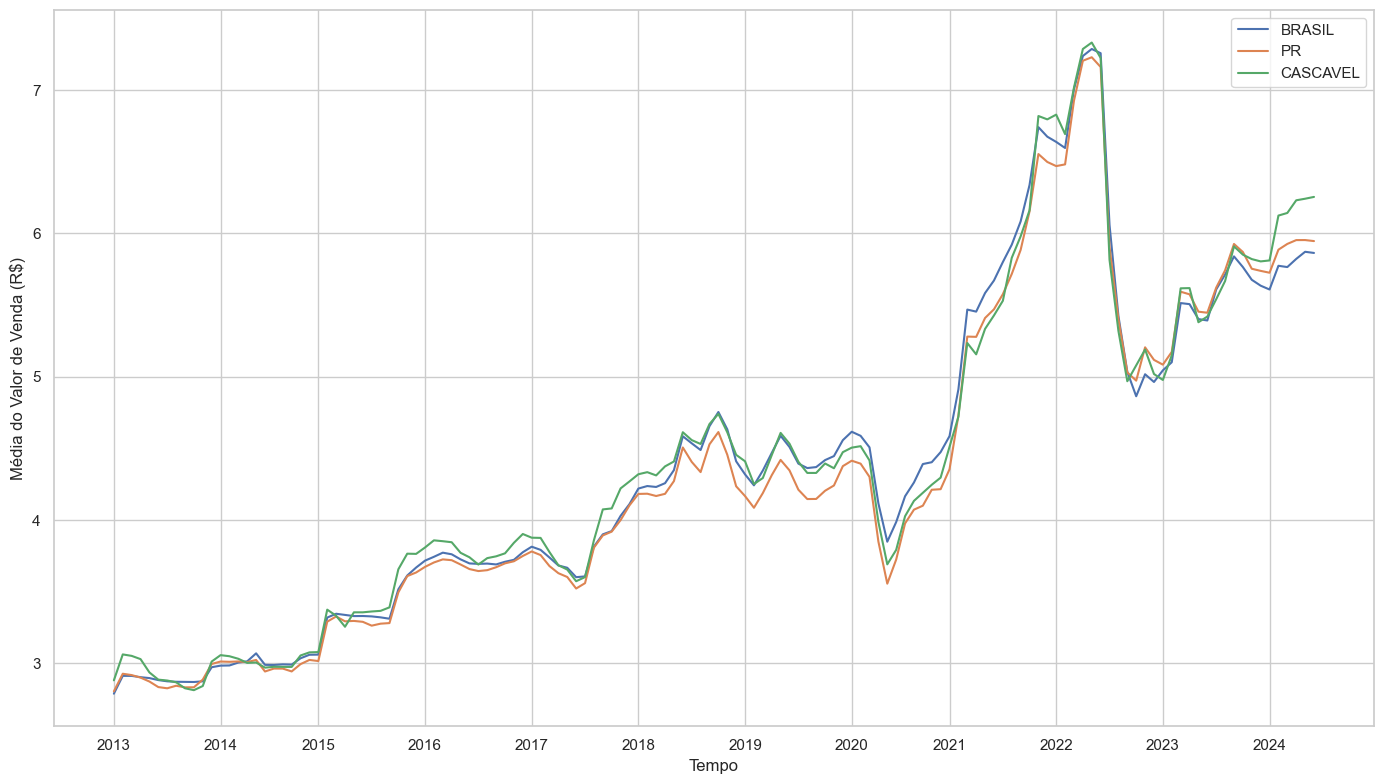

In [41]:
local1 = "brasil"
local2 = "PR"
local3 = "PR_CASCAVEL"
produto = "GASOLINA"
gerar_grafico_comparacao_precos_locais_por_produto(local1, local2, local3, produto)

C:\Users\Pedro\AppData\Local\Temp\ipykernel_21952\2839018951.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_local1_produto["Tempo"] = (
C:\Users\Pedro\AppData\Local\Temp\ipykernel_21952\2839018951.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_local2_produto["Tempo"] = (
C:\Users\Pedro\AppData\Local\Temp\ipykernel_21952\2839018951.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

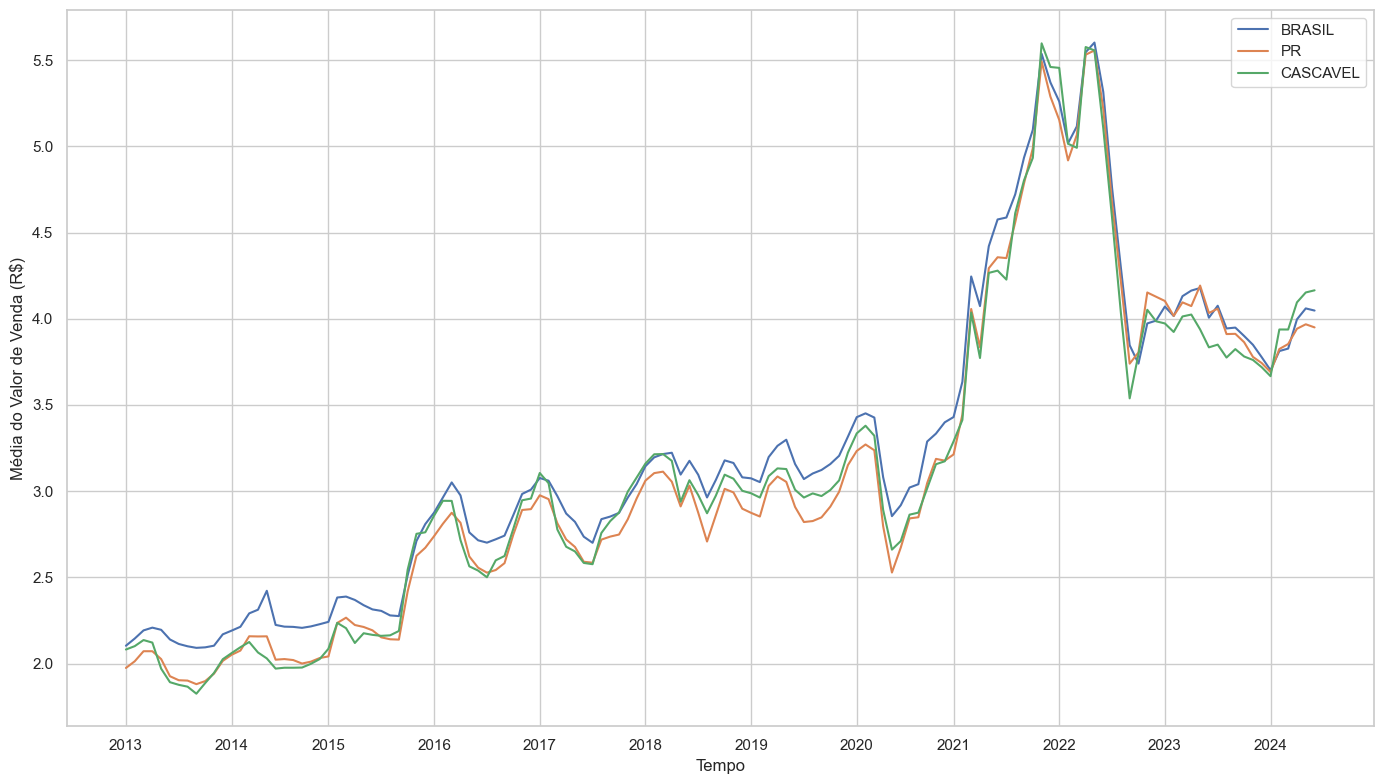

In [42]:
local1 = "brasil"
local2 = "PR"
local3 = "PR_CASCAVEL"
produto = "ETANOL"
gerar_grafico_comparacao_precos_locais_por_produto(local1, local2, local3, produto)

C:\Users\Pedro\AppData\Local\Temp\ipykernel_21952\2839018951.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_local1_produto["Tempo"] = (
C:\Users\Pedro\AppData\Local\Temp\ipykernel_21952\2839018951.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_local2_produto["Tempo"] = (
C:\Users\Pedro\AppData\Local\Temp\ipykernel_21952\2839018951.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

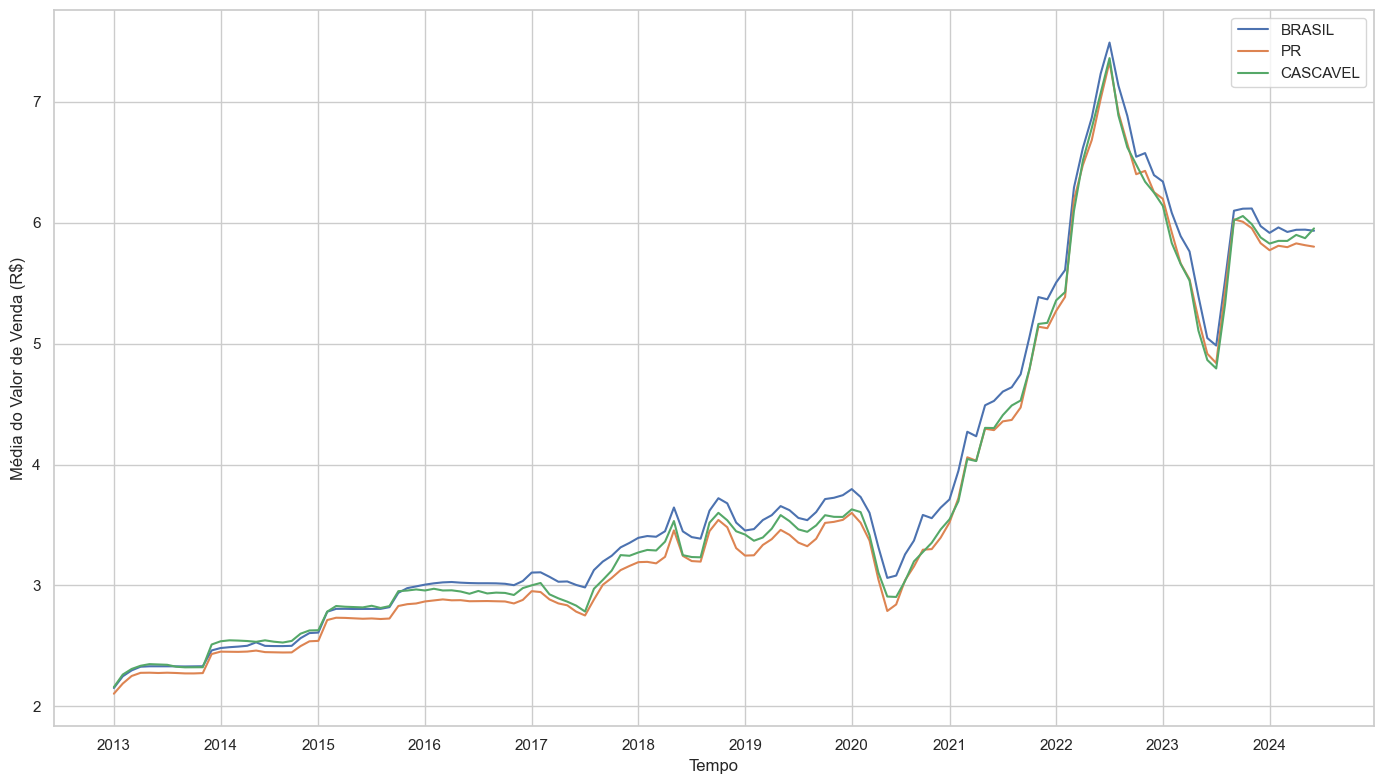

In [43]:
local1 = "brasil"
local2 = "PR"
local3 = "PR_CASCAVEL"
produto = "DIESEL"
gerar_grafico_comparacao_precos_locais_por_produto(local1, local2, local3, produto)

C:\Users\Pedro\AppData\Local\Temp\ipykernel_21952\2839018951.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_local1_produto["Tempo"] = (
C:\Users\Pedro\AppData\Local\Temp\ipykernel_21952\2839018951.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_local2_produto["Tempo"] = (
C:\Users\Pedro\AppData\Local\Temp\ipykernel_21952\2839018951.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

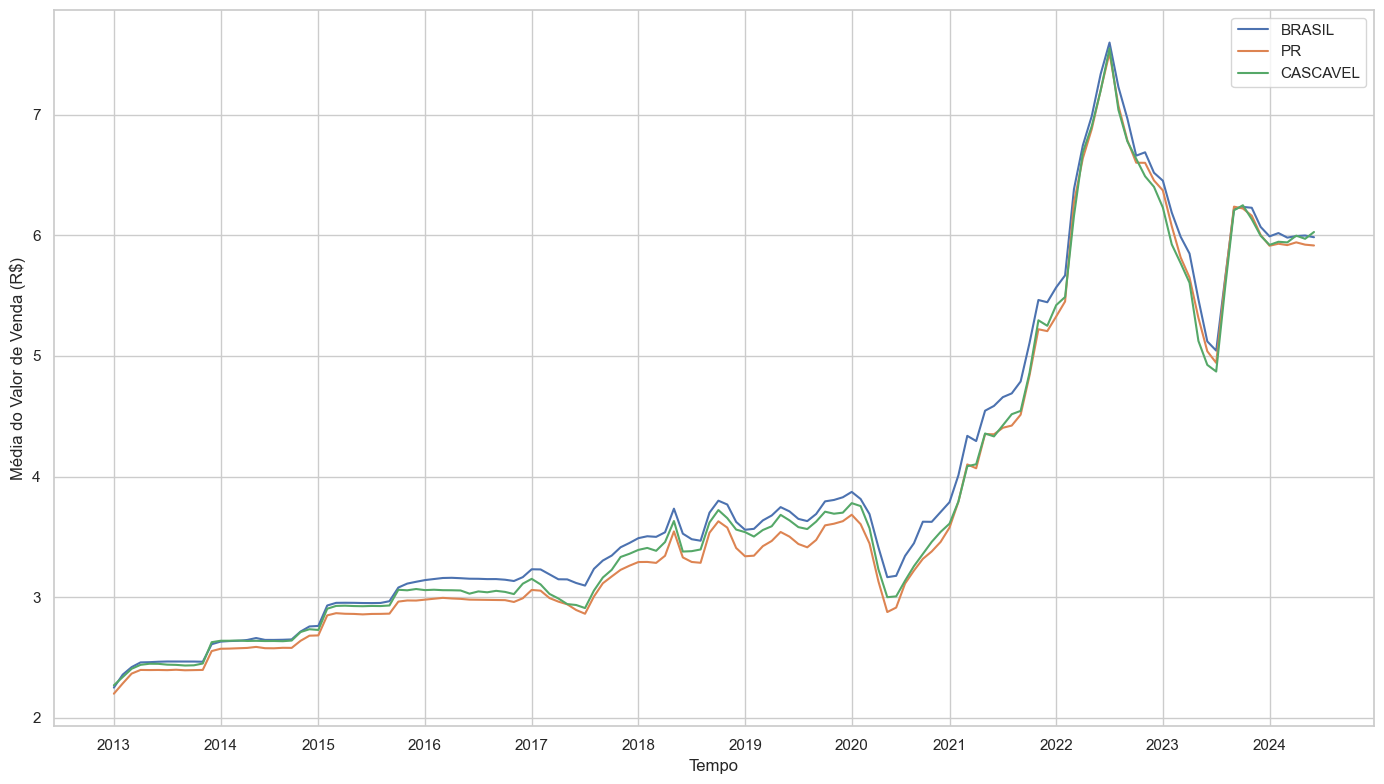

In [44]:
local1 = "brasil"
local2 = "PR"
local3 = "PR_CASCAVEL"
produto = "DIESEL S10"
gerar_grafico_comparacao_precos_locais_por_produto(local1, local2, local3, produto)

In [59]:
def gerar_grafico_variacao_mensal_por_produto(local, produto):
    # Ler os dados do CSV correspondente ao estado
    caminho_csv = f"media_{local}_mes_a_mes.csv"
    df = pd.read_csv(caminho_csv, sep=';')
    
    # Filtrar os dados para o produto específico
    df_produto = df[df['Produto'] == produto]
    
    # Ordenar os dados por 'Ano' e 'Mes'
    df_produto = df_produto.sort_values(by=['Ano', 'Mes'])
    
    # Criar uma coluna 'Tempo' para facilitar o plot
    df_produto['Tempo'] = df_produto['Ano'].astype(str) + '-' + df_produto['Mes'].astype(str).str.zfill(2)
    
    # Calcular a variação percentual mensal
    df_produto['Variacao'] = df_produto['Valor de Venda'].pct_change().shift(-1) * 100
    
    # Configurar o estilo do gráfico com seaborn (opcional)
    sns.set_theme(style="whitegrid")
    
    # Criar o gráfico
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df_produto, x='Tempo', y='Variacao')
    
    # Melhorar as labels e o título
    plt.xlabel("Tempo")
    plt.ylabel("Variação Mensal do Valor de Venda (%)")
    plt.title(f"Variação Mensal do Preço do Produto {produto} no Estado {local}")
    
    # Ajustar a visualização do eixo X para mostrar apenas os anos
    anos_unicos = df_produto["Ano"].drop_duplicates().astype(str)
    plt.xticks(
        ticks=[df_produto[df_produto["Ano"] == int(ano)]["Tempo"].iloc[0] for ano in anos_unicos],
        labels=anos_unicos,
    )
    
    # Mostrar o gráfico
    plt.tight_layout()
    plt.show()

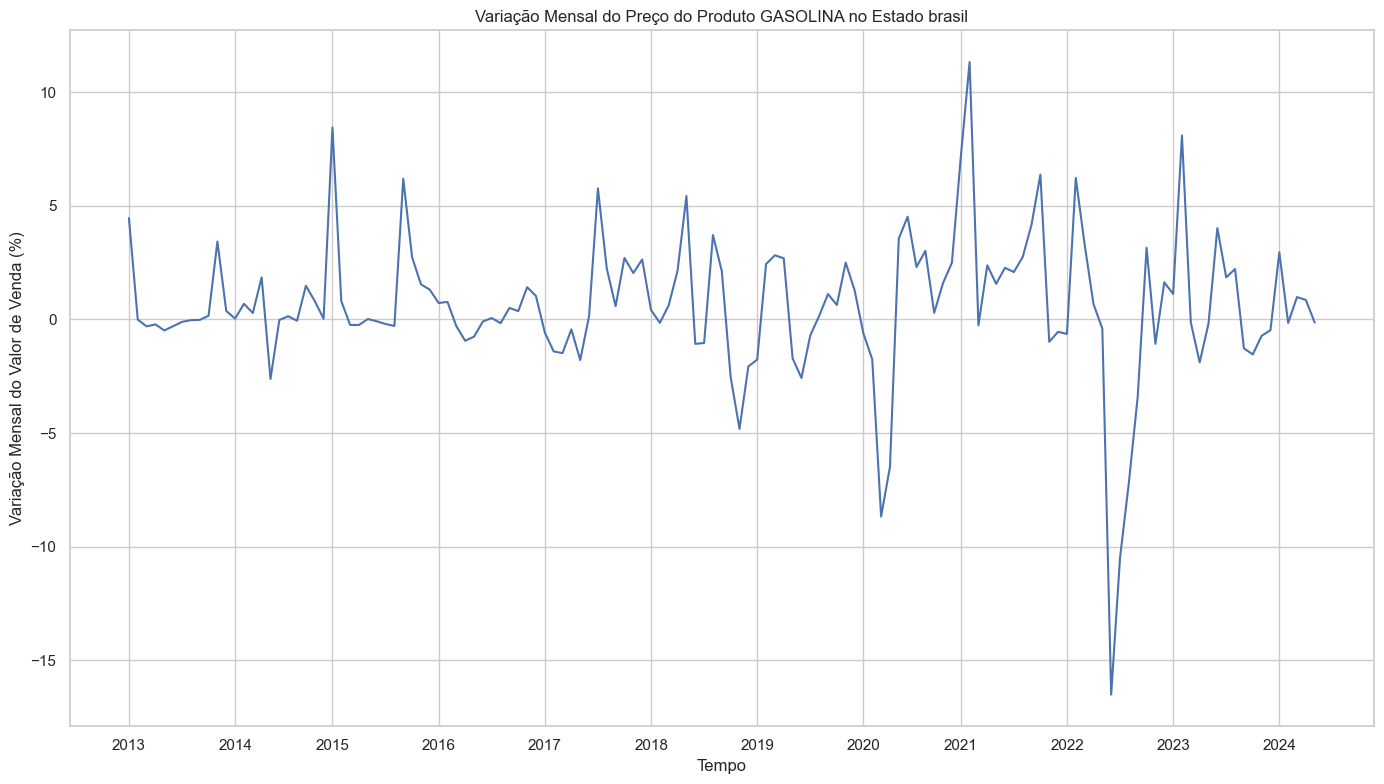

In [60]:
local = "brasil"
produto = "GASOLINA"
gerar_grafico_variacao_mensal_por_produto(local, produto)

In [1]:
def gerar_grafico_variacao_mensal_indices(indice):
    caminho_csv = f"{indice}.csv"
    
    # Ler os dados do CSV correspondente ao índice
    df = pd.read_csv(caminho_csv, sep=',')
    
    # Filtrar os dados para os anos de 2013 em diante
    df = df[df['ano'] >= 2013]
    
    # Criar uma coluna 'Tempo' para facilitar o plot
    df['Tempo'] = df['ano'].astype(str) + '-' + df['mes'].astype(str).str.zfill(2)
    
    # Ordenar os dados por 'Ano' e 'Mes'
    df = df.sort_values(by=['ano', 'mes'])
    
    # Configurar o estilo do gráfico com seaborn (opcional)
    sns.set_theme(style="whitegrid")
    
    # Criar o gráfico
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df, x='Tempo', y='variacao_mensal', marker='o')
    
    # Melhorar as labels e o título
    plt.xlabel("Tempo")
    plt.ylabel("Variação Mensal (%)")
    plt.title(f"Variação Mensal do {indice.upper()}")
    
    # Ajustar a visualização do eixo X para mostrar apenas os anos
    anos_unicos = df["ano"].drop_duplicates().astype(str)
    plt.xticks(
        ticks=[df[df["ano"] == int(ano)]["Tempo"].iloc[0] for ano in anos_unicos],
        labels=anos_unicos,
    )
    
    # Mostrar o gráfico
    plt.tight_layout()
    plt.show()

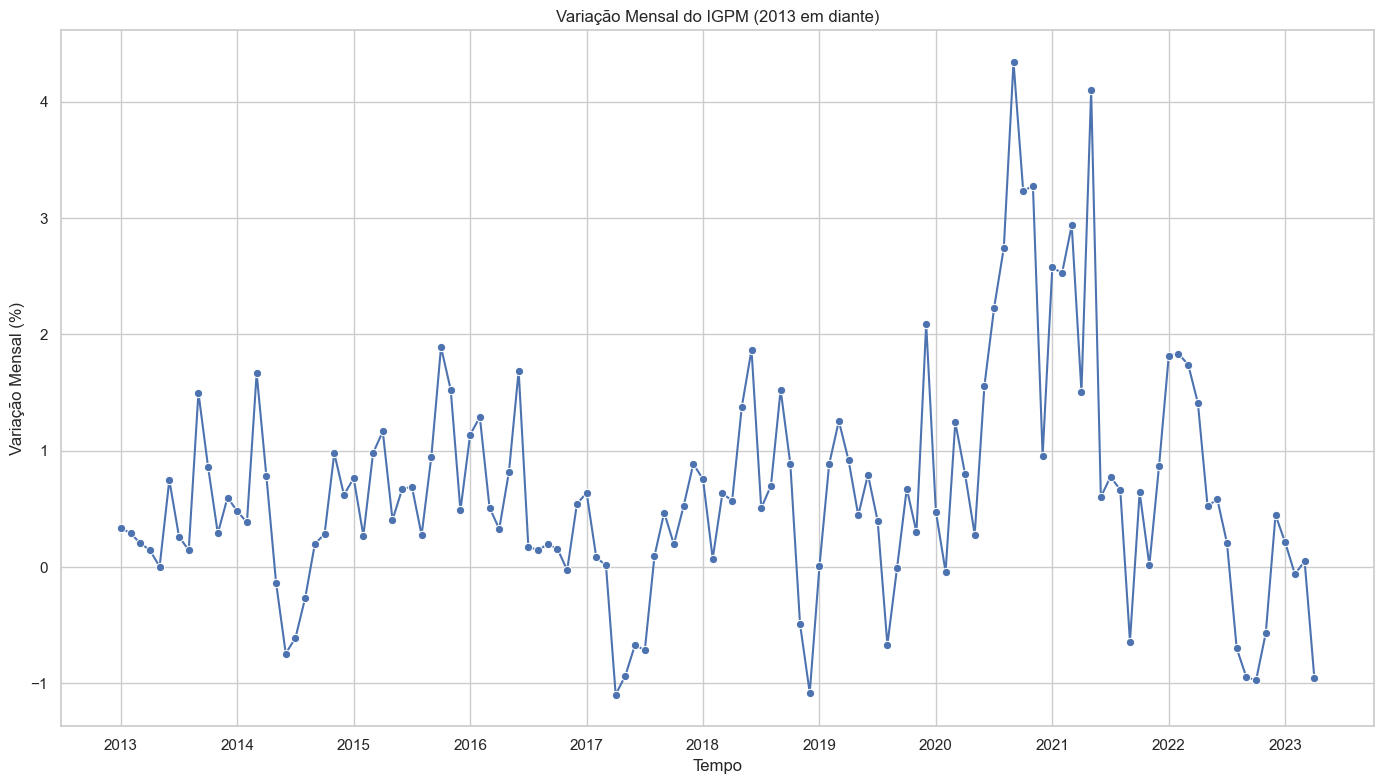

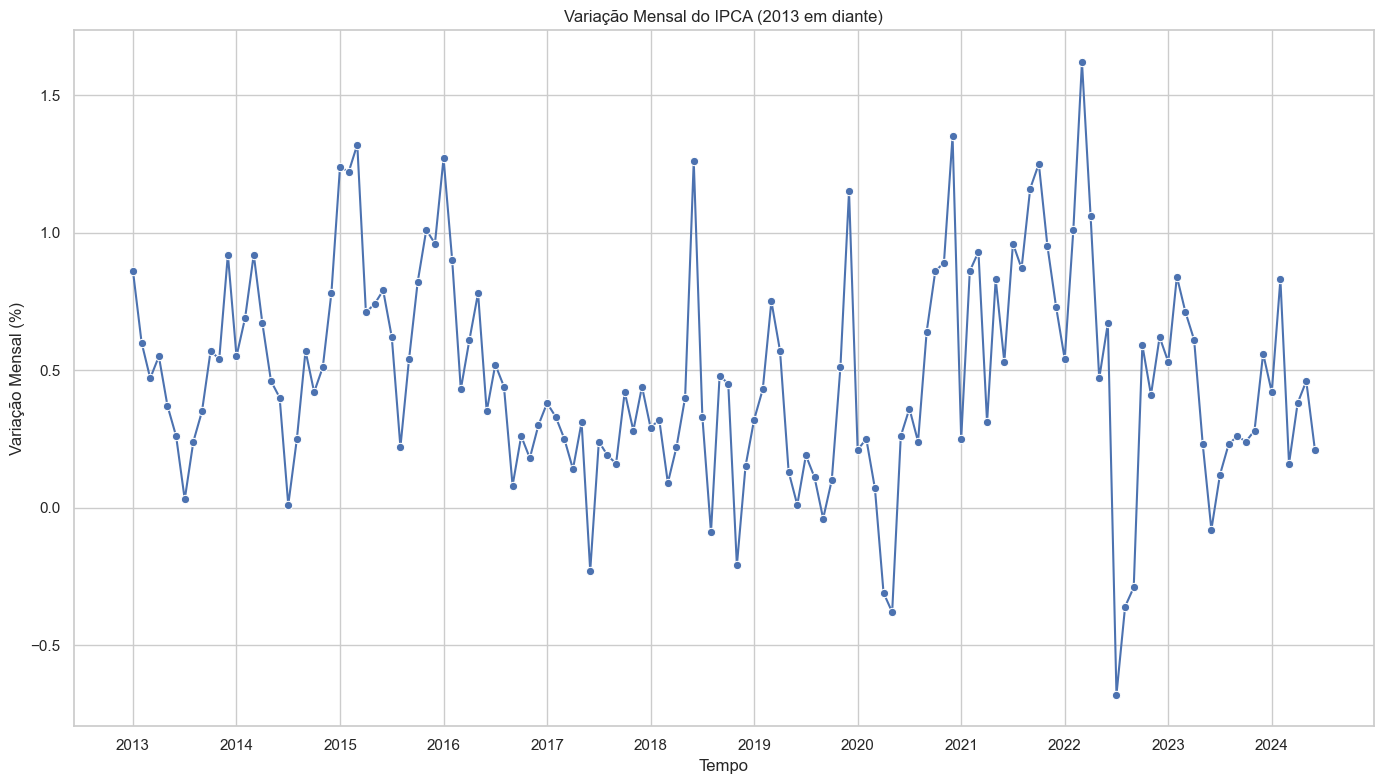

In [35]:
gerar_grafico_variacao_mensal_indices("igpm")
gerar_grafico_variacao_mensal_indices("ipca")

In [4]:
def comparar_indices():
    # Ler os dados dos arquivos CSV
    igpm_df = pd.read_csv("igpm.csv", sep=',')
    ipca_df = pd.read_csv("ipca.csv", sep=',')

    # Filtrar os dados para os anos de 2013 em diante
    igpm_df = igpm_df[igpm_df['ano'] >= 2013]
    ipca_df = ipca_df[ipca_df['ano'] >= 2013]

    # Adicionar uma coluna para identificar os índices
    igpm_df['Indice'] = 'IGPM'
    ipca_df['Indice'] = 'IPCA'

    # Criar uma coluna 'Tempo' para facilitar o plot
    igpm_df['Tempo'] = igpm_df['ano'].astype(str) + '-' + igpm_df['mes'].astype(str).str.zfill(2)
    ipca_df['Tempo'] = ipca_df['ano'].astype(str) + '-' + ipca_df['mes'].astype(str).str.zfill(2)

    # Concatenar os DataFrames
    df = pd.concat([igpm_df, ipca_df])

    # Ordenar os dados por 'Ano' e 'Mes'
    df = df.sort_values(by=['ano', 'mes'])

    # Configurar o estilo do gráfico com seaborn (opcional)
    sns.set_theme(style="whitegrid")

    # Criar o gráfico
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df, x='Tempo', y='variacao_mensal', hue='Indice')

    # Melhorar as labels e o título
    plt.xlabel("Tempo")
    plt.ylabel("Variação Mensal (%)")
    plt.title("Comparação da Variação Mensal entre IGPM e IPCA (2013 em diante)")

    # Ajustar a visualização do eixo X para mostrar apenas os anos
    anos_unicos = df["ano"].drop_duplicates().astype(str)
    plt.xticks(
        ticks=[df[df["ano"] == int(ano)]["Tempo"].iloc[0] for ano in anos_unicos],
        labels=anos_unicos,
    )

    # Mostrar o gráfico
    plt.tight_layout()
    plt.show()

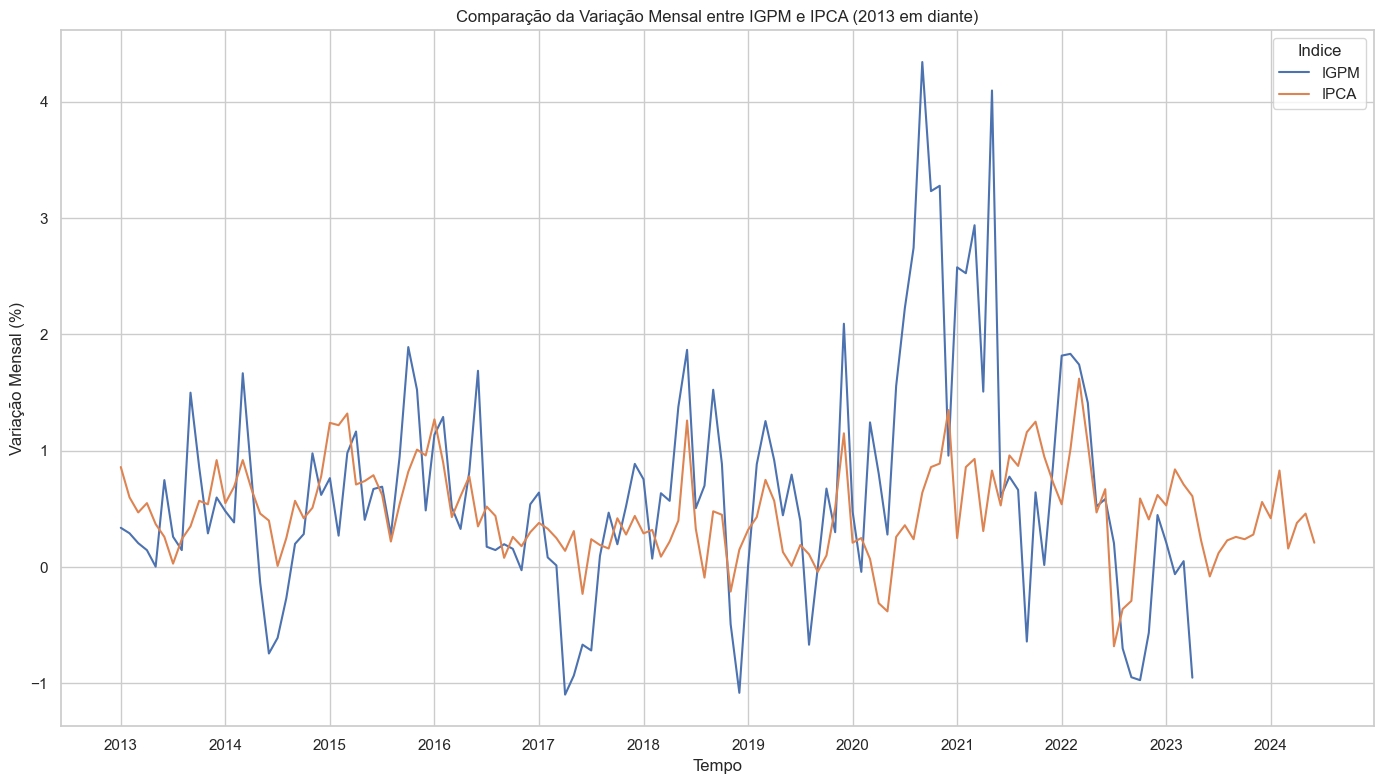

In [23]:
comparar_indices()

In [2]:
def comparar_indices_com_produto(local, produto):
    # Ler os dados dos arquivos CSV dos índices
    igpm_df = pd.read_csv("igpm.csv", sep=",")
    ipca_df = pd.read_csv("ipca.csv", sep=",")
    
    # Filtrar os dados para os anos de 2013 em diante
    igpm_df = igpm_df[igpm_df["ano"] >= 2013]
    ipca_df = ipca_df[ipca_df["ano"] >= 2013]
    
    # Adicionar uma coluna para identificar os índices
    igpm_df["Indice"] = "IGPM"
    ipca_df["Indice"] = "IPCA"
    
    # Criar uma coluna 'Tempo' para facilitar o plot
    igpm_df["Tempo"] = igpm_df["ano"].astype(str) + "-" + igpm_df["mes"].astype(str).str.zfill(2)
    ipca_df["Tempo"] = ipca_df["ano"].astype(str) + "-" + ipca_df["mes"].astype(str).str.zfill(2)
    
    # Concatenar os DataFrames dos índices
    indices_df = pd.concat([igpm_df, ipca_df])
    
    # Ler os dados do CSV correspondente ao local
    caminho_csv = f"media_{local}_mes_a_mes.csv"
    produto_df = pd.read_csv(caminho_csv, sep=";")
    
    # Filtrar os dados para o produto específico e para os anos de 2013 em diante
    produto_df = produto_df[(produto_df["Produto"] == produto)]
    
    # Criar uma coluna 'Tempo' para facilitar o plot
    produto_df["Tempo"] = produto_df["Ano"].astype(str) + "-" + produto_df["Mes"].astype(str).str.zfill(2)
    
    # Ordenar os dados por 'Ano' e 'Mes'
    produto_df = produto_df.sort_values(by=["Ano", "Mes"])
    
    # Calcular a variação percentual mensal do produto
    produto_df["Variacao"] = produto_df["Valor de Venda"].pct_change().shift(-1) * 100
    
    # Adicionar uma coluna para identificar os dados do produto
    produto_df["Indice"] = produto + " " + local.upper()
    
    # Concatenar os DataFrames dos índices e do produto
    df_indices = indices_df[["Tempo", "variacao_mensal", "Indice"]]
    df_produto = produto_df[["Tempo", "Variacao", "Indice"]].rename(columns={"Variacao": "variacao_mensal"})
    
    # Concatenar os DataFrames e garantir que não haja duplicatas
    df = pd.concat([df_indices, df_produto])
    
    # Verificar e resolver duplicatas: agrupar pela média se houver duplicatas
    df = df.groupby(["Tempo", "Indice"]).mean().reset_index()
    
	# Reordenar os dados para que o produto seja plotado por último
    ordem_indices = ["IGPM", "IPCA", produto + " " + local.upper()]
    df["Indice"] = pd.Categorical(df["Indice"], categories=ordem_indices, ordered=True)
    
    # Configurar o estilo do gráfico com seaborn (opcional)
    sns.set_theme(style="whitegrid")
    
    # Criar o gráfico
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df, x="Tempo", y="variacao_mensal", hue="Indice")
    
    # Melhorar as labels e o título
    plt.xlabel("Tempo")
    plt.ylabel("Variação Mensal (%)")
    
    # Ajustar a visualização do eixo X para mostrar apenas os anos
    anos_unicos = df["Tempo"].apply(lambda x: x.split("-")[0]).drop_duplicates()
    plt.xticks(
        ticks=[df[df["Tempo"].str.startswith(ano)]["Tempo"].iloc[0] for ano in anos_unicos],
        labels=anos_unicos,
    )
    
    # Mostrar o gráfico
    plt.tight_layout()
    plt.show()

# Exemplo de uso
# comparar_indices_com_produto("brasil", "GASOLINA")
# comparar_indices_com_produto("PR", "ETANOL")


In [ ]:
comparar_indices_com_produto("brasil", "GASOLINA")
comparar_indices_com_produto("brasil", "ETANOL")
comparar_indices_com_produto("brasil", "DIESEL")
comparar_indices_com_produto("brasil", "DISEL S10")

In [ ]:
comparar_indices_com_produto("PR", "GASOLINA")
comparar_indices_com_produto("PR", "ETANOL")
comparar_indices_com_produto("PR", "DIESEL")
comparar_indices_com_produto("PR", "DIESEL S10")

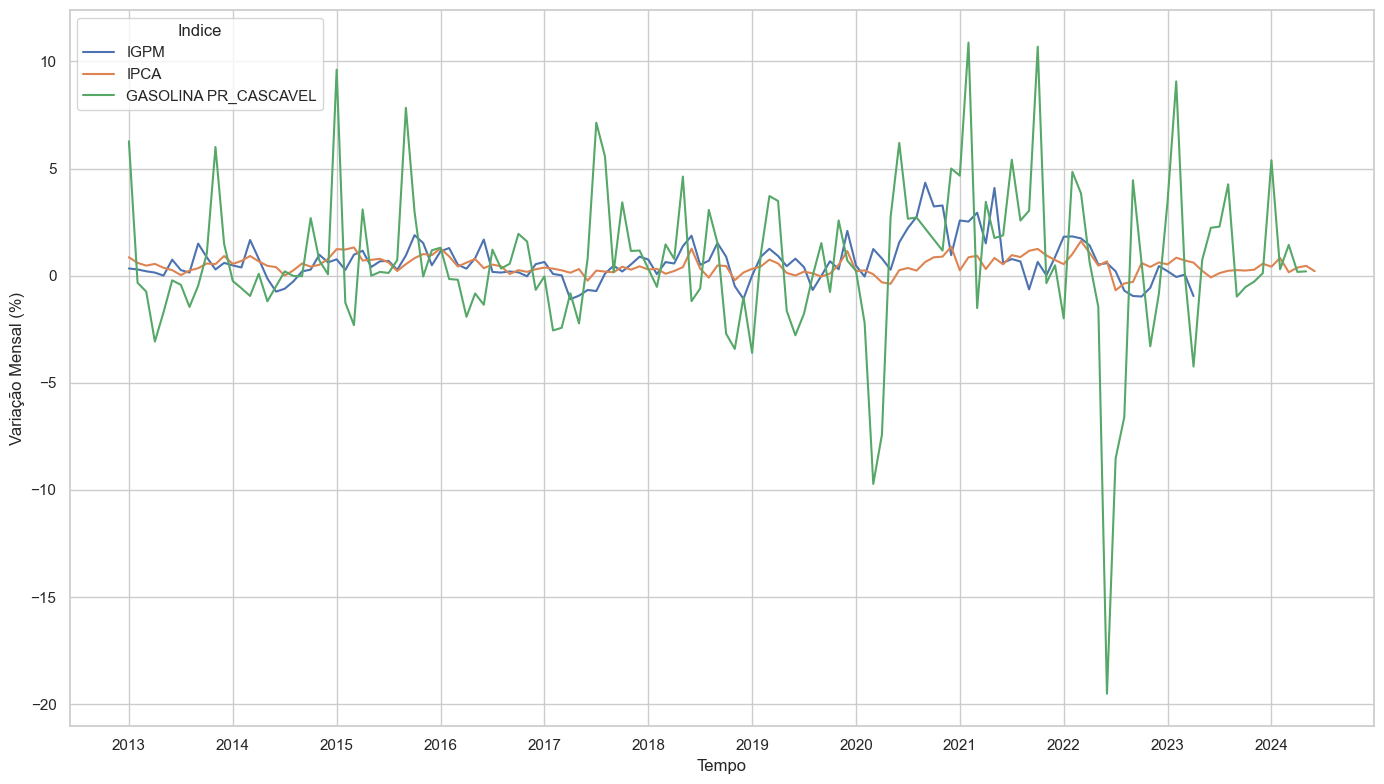

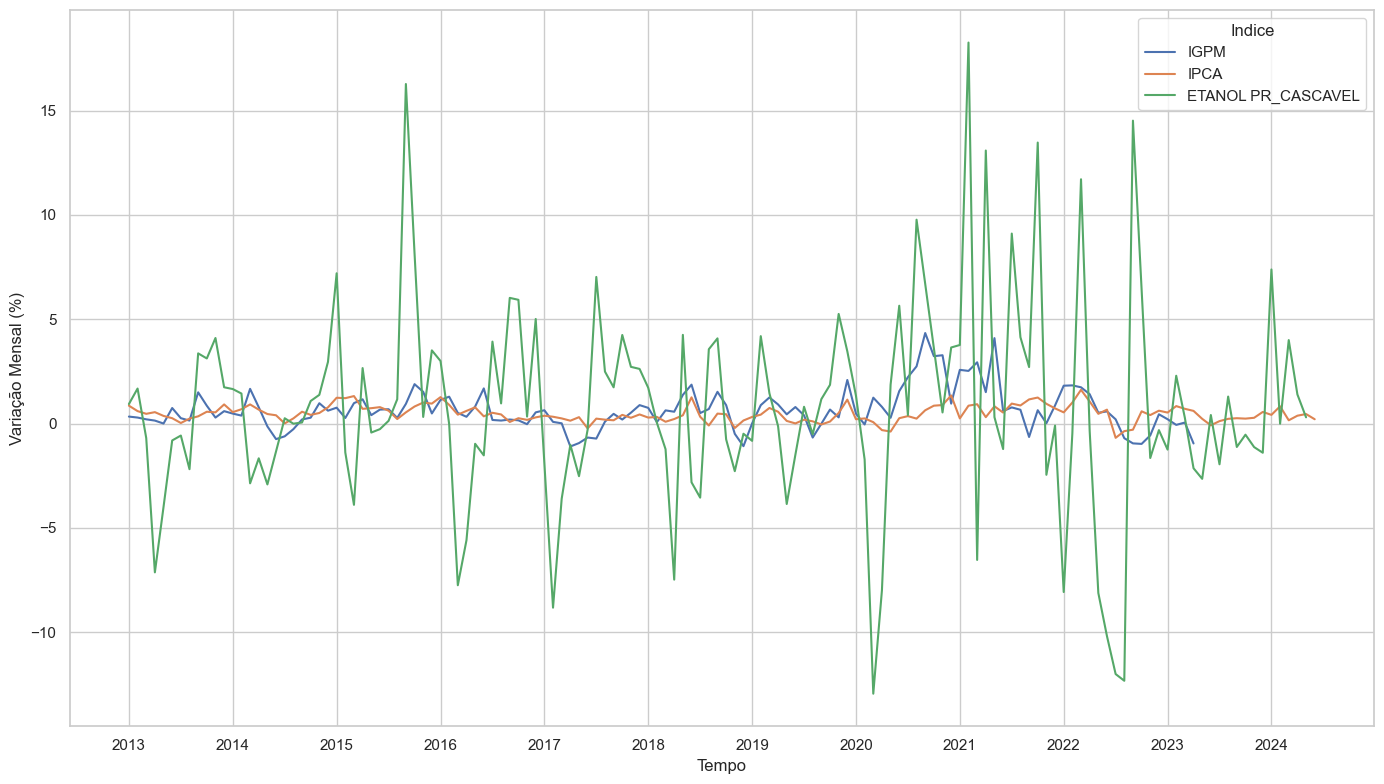

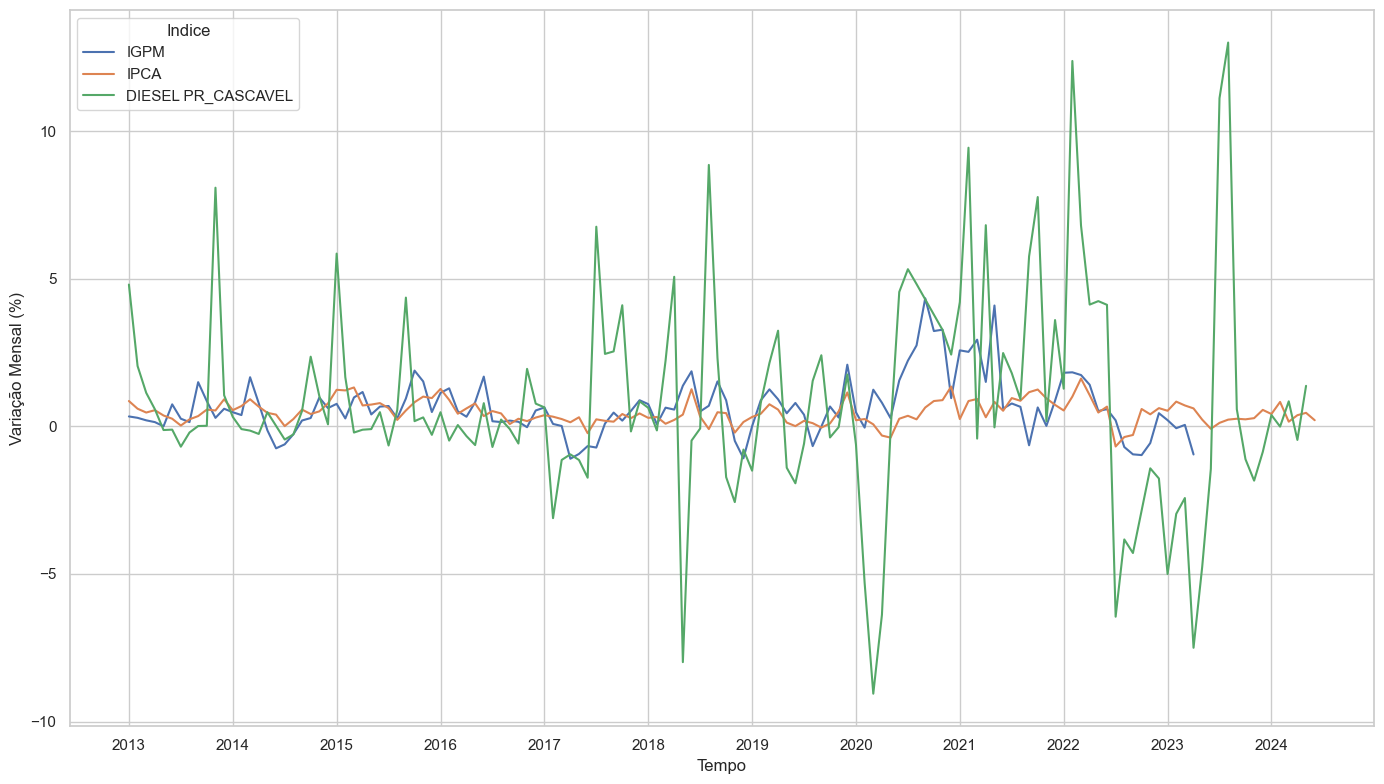

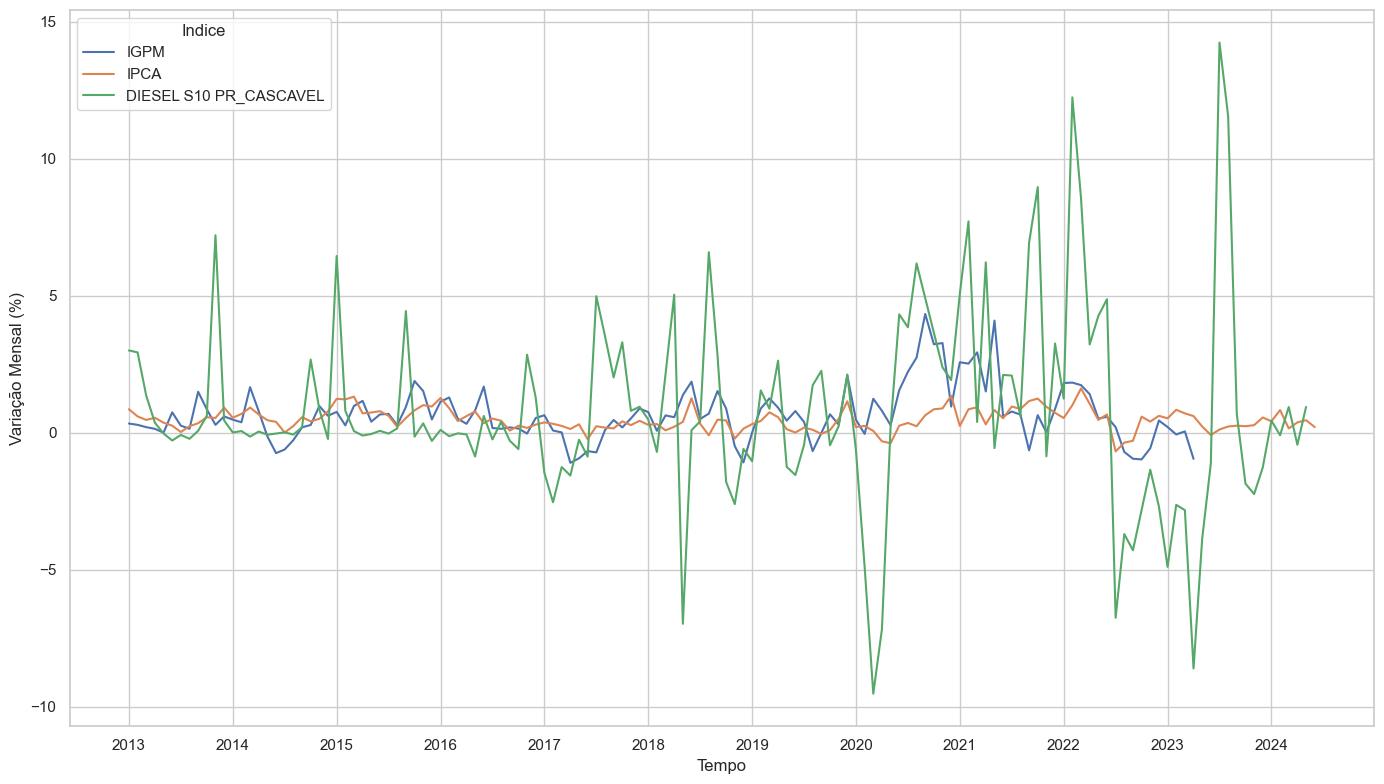

In [3]:
comparar_indices_com_produto("PR_CASCAVEL", "GASOLINA")
comparar_indices_com_produto("PR_CASCAVEL", "ETANOL")
comparar_indices_com_produto("PR_CASCAVEL", "DIESEL")
comparar_indices_com_produto("PR_CASCAVEL", "DIESEL S10")